In [1]:
%pylab inline
from pandas import DataFrame
from wallet.util.analysis import Analysis, _optimize, _moving_average_statistics
equity = {'SCHG':60,'SCHA':10,'SCHF':20,'SCHE':10}
income = {'VGLT':40,'SCHP':40,'SCHH':20}
direxion = {'TMF':60,'SPXL':40}
symbols = [*equity, *income, *direxion,'UVXY']

Populating the interactive namespace from numpy and matplotlib


In [ ]:
########################################

In [2]:
ana = Analysis(symbols, 21, 5)
print(ana)
ana.screen()

from 2020-06-11 to 2020-07-17 - 10 symbols


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHP,21.0,0.082119,0.046229,0.013333,0.023213,0.083459,0.167639,0.170706,1.604676,1.846255,0.268553,0.420993
VGLT,21.0,0.144134,0.188778,-0.252248,-0.200255,0.141231,0.439771,0.458233,0.721468,1.766650,2.277493,-0.280323
TMF,21.0,0.418186,0.574227,-0.806884,-0.636748,0.436277,1.304497,1.376300,0.714438,5.060185,6.730528,-0.323119
SCHG,21.0,0.326138,0.467522,-0.396535,-0.383572,0.340034,0.902516,1.343317,0.680614,10.045796,3.735796,0.217721
SCHE,21.0,0.430775,0.681806,-0.499017,-0.481370,0.281005,1.648665,1.824068,0.620174,10.969131,2.473763,0.664725
SCHF,21.0,0.170923,0.317274,-0.376229,-0.341024,0.192858,0.608859,0.778419,0.513708,6.676715,2.675593,-0.249002
SPXL,21.0,0.578276,1.223791,-1.687479,-1.348026,0.914576,2.091746,3.247698,0.466043,22.356182,11.341155,-0.133894
SCHA,21.0,0.126010,0.489775,-0.678991,-0.511383,0.049108,0.913682,1.038148,0.241078,8.322479,5.451583,0.307580
SCHH,21.0,-0.255403,0.710639,-1.504809,-1.437562,-0.154374,0.933881,0.982061,-0.370568,-0.861472,10.028045,0.059189


2020-07-06 rebalance: buy SCHF,TMF,UVXY, sell SCHG,SCHA,SCHE,SPXL


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.311907,0.332174,-0.239069,-0.231455,0.370069,0.713456,0.927689,0.915094,8.341386,2.069473,-0.083825
Portfolio-RB,21.0,0.315956,0.338570,-0.239069,-0.231455,0.370069,0.753935,0.927689,0.909766,8.249850,2.069473,-0.043503


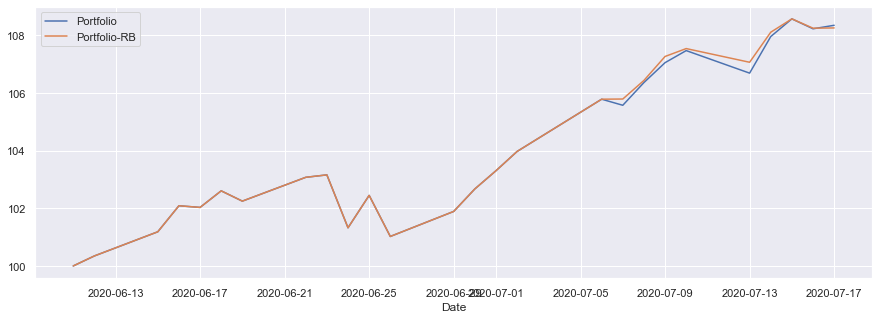

In [3]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in direxion.items()},
  'UVXY':4}, drop_components=True)

2020-07-10 rebalance: buy VGLT,SCHP,SCHH,UVXY, sell SCHG,SCHA,SCHF,SCHE


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio-RB,21.0,0.153848,0.233489,-0.197142,-0.17704,0.181368,0.46223,0.663698,0.624918,4.387703,1.667881,0.237375
Portfolio,21.0,0.151776,0.234515,-0.197142,-0.17704,0.181368,0.46223,0.663698,0.613347,4.487328,1.667881,0.250317


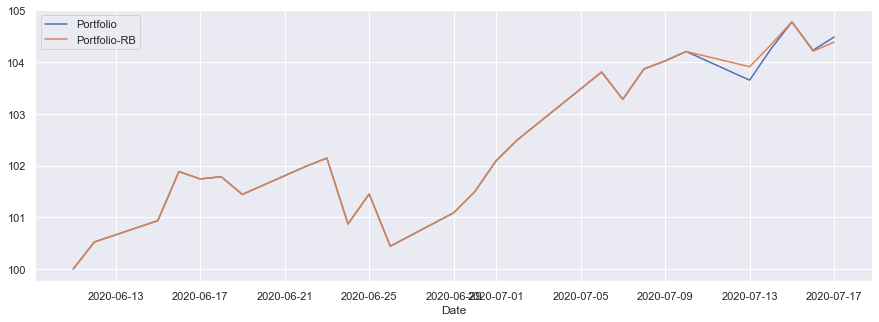

In [4]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in income.items()},
  'UVXY':4}, drop_components=True)

In [ ]:
########################################

In [5]:
ana = Analysis(symbols, 126, 5)
print(ana)
ana.screen()

from 2020-01-10 to 2020-07-17 - 10 symbols


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
VGLT,126.0,0.151356,0.571417,-1.506080,-0.665301,0.107426,0.944645,2.240843,0.250990,21.013172,14.205465,0.416547
TMF,126.0,0.363978,1.777200,-4.927028,-2.072116,0.366550,2.625755,6.885180,0.200339,55.885094,43.823930,0.214564
UVXY,126.0,0.964875,5.645076,-10.003285,-5.218885,-0.464727,13.590342,18.468971,0.169517,141.156173,75.097171,1.311043
SCHP,126.0,0.048277,0.397272,-1.543209,-0.670254,0.065243,0.407875,1.716754,0.101543,6.549604,10.848025,-0.356012
SCHG,126.0,0.085936,1.075371,-3.578390,-2.405134,0.280343,1.452066,3.087518,0.072532,11.987381,32.392020,-1.054710
SCHE,126.0,-0.043027,1.066037,-3.796187,-2.167029,0.106399,1.542235,2.614515,-0.047807,-5.839550,33.805805,-0.944938
SCHF,126.0,-0.063866,1.140490,-4.372914,-2.400774,0.087814,1.349526,2.949997,-0.062957,-7.208697,34.642435,-1.048912
SCHA,126.0,-0.096107,1.507034,-5.282314,-3.519768,0.034971,2.265215,3.035498,-0.069038,-10.199132,42.408580,-0.911131
SPXL,126.0,-0.264452,3.413906,-11.748033,-7.804074,0.518875,3.909749,8.428523,-0.079788,-30.901373,76.856126,-1.203640


2020-01-31 rebalance: buy SCHG,SCHA,SCHF,SCHE,SPXL, sell TMF,UVXY
2020-02-25 rebalance: buy SCHG,SCHA,SCHF,SCHE,SPXL, sell TMF,UVXY
2020-03-17 rebalance: buy SCHG,SCHA,SCHF,SCHE,SPXL, sell TMF,UVXY
2020-04-14 rebalance: buy SCHA,SCHF,SCHE,UVXY, sell SCHG,TMF,SPXL
2020-05-26 rebalance: buy SCHF,SCHE,TMF,UVXY, sell SCHG,SCHA,SPXL
2020-07-06 rebalance: buy SCHA,TMF,UVXY, sell SCHG,SCHF,SCHE,SPXL


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio-RB,126.0,0.208220,0.797376,-2.145716,-1.350169,0.262710,1.511165,2.837615,0.251178,30.660447,18.013993,-0.038699
Portfolio,126.0,0.115279,0.544213,-1.786049,-0.781432,0.157517,1.041120,2.049522,0.197243,15.755722,10.521313,-0.068524


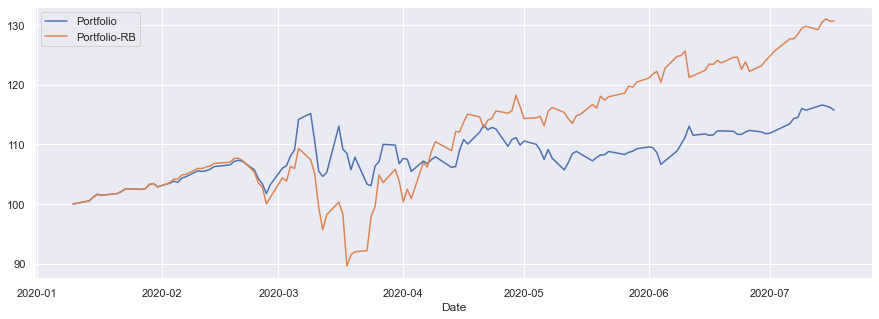

In [6]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in direxion.items()},
  'UVXY':4}, drop_components=True)

2020-02-27 rebalance: buy SCHG,SCHA,SCHF,SCHE,SCHH, sell VGLT,SCHP,UVXY
2020-03-19 rebalance: buy SCHG,SCHA,SCHF,SCHE,SCHP,SCHH, sell VGLT,UVXY
2020-04-14 rebalance: buy VGLT,SCHP,UVXY, sell SCHG,SCHA,SCHF,SCHE,SCHH
2020-06-01 rebalance: buy VGLT,SCHP,SCHH,UVXY, sell SCHG,SCHA,SCHF,SCHE


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio-RB,126.0,0.158407,0.478045,-1.443446,-0.580739,0.157574,0.875605,2.045697,0.314763,22.525147,8.347363,0.641899
Portfolio,126.0,0.081315,0.458182,-1.578521,-0.625947,0.125024,0.832272,1.934874,0.160152,10.539175,11.141213,-0.322087


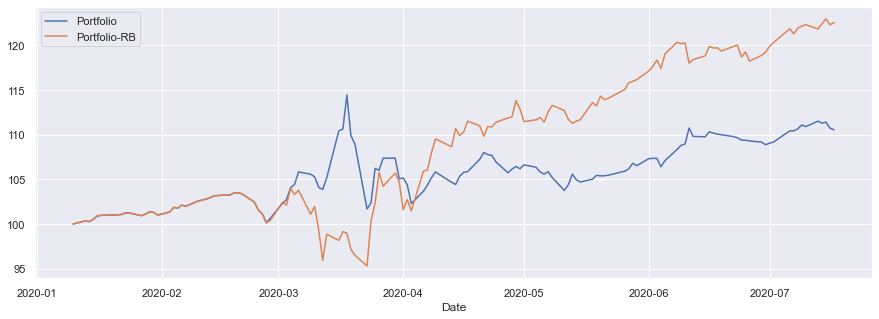

In [7]:
ana.graph({
  **{k:v*.60 for k,v in equity.items()},
  **{k:v*.36 for k,v in income.items()},
  'UVXY':4}, drop_components=True)

In [ ]:
########################################

In [ ]:
ana.setup_mask([*equity, *income])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['Equity'] = sum(data[st] * sh for st, sh in equity.items())
for col in equity.keys():
    del data[col]
data['Income'] = sum(data[st] * sh for st, sh in income.items())
for col in diversification.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, True, False))
_moving_average_statistics(frame, 5, .008)

In [ ]:
ana.setup_mask([*equity, *direxion])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['Equity'] = sum(data[st] * sh for st, sh in equity.items())
for col in equity.keys():
    del data[col]
data['Direxion'] = sum(data[st] * sh for st, sh in direxion.items())
for col in direxion.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, True, False))
_moving_average_statistics(frame, 5, .008)